In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_class.csv', sep=';')
df

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,customer_active_segment,X1,affinity_score
0,22.500174,3.702145,0.118811,0.093253,-0.372171,1.755587,3.748009,3,3,0
1,13.225950,3.600102,0.130985,0.053575,-1.946621,1.371272,3.469659,3,1,1
2,14.603376,5.084047,-0.004651,-0.036299,-1.097486,1.448015,3.855939,3,1,1
3,26.149905,3.025501,0.229740,0.204591,1.326652,1.937680,2.362421,3,3,0
4,19.810630,5.020400,-0.011347,-0.028780,-1.248827,1.522902,3.278624,4,3,1
...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,-1.088837,1.397004,4.758199,4,1,1
7156,25.363705,4.881059,0.038720,0.054397,0.897137,2.025810,1.823892,4,3,0
7157,11.160720,5.019859,0.053864,-0.102337,1.603054,2.150058,2.422193,4,3,0
7158,17.140020,9.269037,0.059911,-0.004299,-1.028902,1.433648,3.715392,4,3,1


Данный датасет состоит из 10 колонок, одна из которых является критерием для классификации. Это переменная affinity_score, она имеет булевые значения. При наличии 1 можно говорить о привязанности клиента к сайту, а при 0 - о низкой привязанности либо же её отсутствии. 

Критерий класификации был создан на основе подготовленной базы данных, поэтому не нужно ничего дополнительно преобразовывать и кодировать.

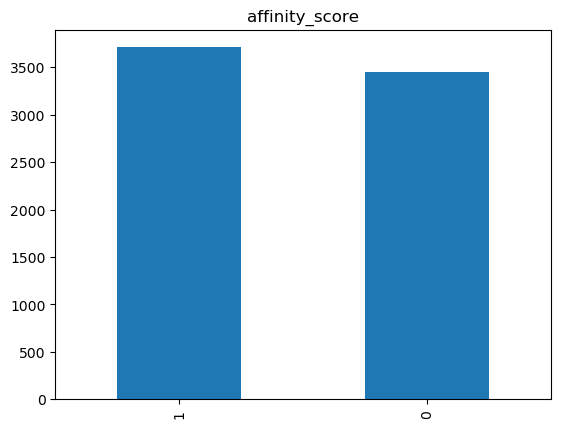

In [3]:
df['affinity_score'].value_counts().plot(kind='bar', title='affinity_score')
plt.show()

Видим, что элементы выборки сбалансированы.

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

На основе обучающей виборки провели шкалирование данных.

In [6]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.294321
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.575    
Dependent Variable: y                AIC:              3389.7408
Date:               2021-12-15 10:30 BIC:              3449.6189
No. Observations:   5728             Log-Likelihood:   -1685.9  
Df Model:           8                LL-Null:          -3966.8  
Df Residuals:       5719             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.0539     0.0546    -0.9868   0.3237   -0.1608    0.0531
x2       0.0864     0.0524     1.6472   0.0995   -0.0164    0.1891
x3 

Видим, что коэф детериминации у нас на низком уровне, всего примерно 60%. То есть имеющихся параметров недостаточно для полного объяснения У. По р-значениям можно выделить 4-е значимых фактора при степени значимости 0,001: х5, х6, х7, х9.

При помощи рекурсивного исключения признаков выделем значимые параметы для дальнейшего построения модели.

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

7
[ True False False  True  True  True  True  True  True]
[1 3 2 1 1 1 1 1 1]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To s

По итогу проведения данной оперции было выделено немного инные признаки, нежели мы определили по анализу р-значений. Таким образом, система определила 7 значимых признаков.

Теперь выведем те параметры, которые были выбраны значимыми.

In [8]:
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0, 3, 4, 5, 6, 7, 8]
№	Index	Feature
0	0	visit_score
1	3	stay_score
2	4	frequency_score
3	5	product_variation_score
4	6	order_score
5	7	customer_active_segment
6	8	X1


In [9]:
X_train_select=X_train[:, selected_columns]
X_test_select=X_test[:, selected_columns]

In [10]:
X_train = X_train[:,[4,5,6,8]]
X_test = X_test[:,[4,5,6,8]]

Загрузили в выборки только те параметры, которые были определены самостоятельно по р-значения меньше 0,001. 

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
y_pred = lr.predict(X_test)
lr.score(X_test,y_test), lr.score(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(0.8701117318435754, 0.8633030726256983)

По сравнению с R2 начальной модели, где учитывались все факторы, данная обучающая модель показывает намного лучше уровень объяснённости. Также хорошие результаты имеет тестовая выборка.  

Так как автоматическое выделение факторов не сошлось с моим личным анализом, то я приняла решение построить ещё одну модель с учетом параметров, отобраных системой. Сравним, какая модель будет более качетвенной.

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train_select, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
y_pred_select = lr.predict(X_test_select)
lr.score(X_test_select,y_test), lr.score(X_train_select, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(0.869413407821229, 0.8627793296089385)

Результаты обоих моделей почти одинаковые, у машинного подбора немного хуже. Чтоб окончательно определить результаты моделей, построим матрицы результатов классификаций.

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[577 111]
 [ 75 669]]


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_select)
print(cm)

[[579 109]
 [ 78 666]]


Проанализировав обе матрицы видим почти идентичные варианты классификации. Модели лучше распознают негативные случаи, когда привязанность клиента к сайту низкая. Точность классификации около 87%, это хороший результат. Для дальнейших методов классификации я приняла решение выбрать те значимые переменные, которые определены автоматическим подбором. 

In [17]:
X_train=X_train_select
X_test=X_test_select

In [18]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_class.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()